In [75]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import IntSlider, Play, interactive, jslink

Area of circle = $\pi r^2$

Area of enclosing square = $4 r^2$

ratio = $\dfrac{\pi r^2}{4 r^2}$

Assuming unit radius, ratio = $\dfrac{\pi}{4}$

In [84]:
np.random.seed(42)

T = 1000
r = 1

samples = np.random.uniform(-1, 1, size=(T, 2))
print(samples.shape)

pi_estimates = np.zeros(shape=(T,))
pi_estimates[0] = np.nan
for t in range(1, T):
    within_circle = np.linalg.norm(samples[:t, :], axis=1) <= r
    circle_area = within_circle.mean()
    pi_estimates[t] = circle_area * 4
print(pi_estimates.shape)

(1000, 2)
(1000,)


[Text(0.5, 0, 'Step'), Text(0, 0.5, 'Estimation')]

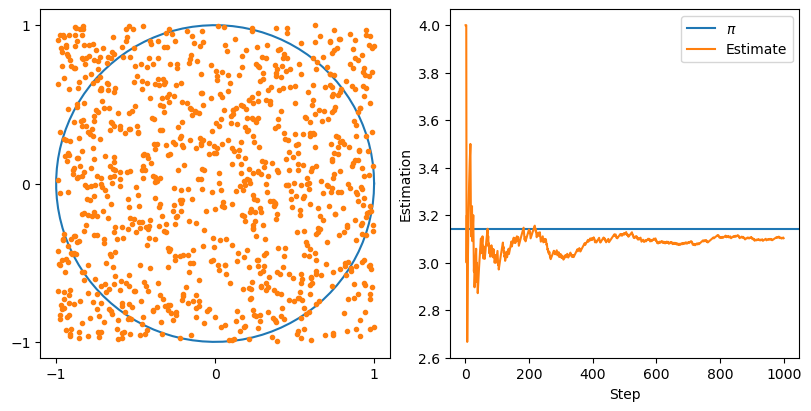

In [89]:
fig, axes = plt.subplots(
    ncols=2,
    nrows=1,
    figsize=(8, 4),
    constrained_layout=True,
)

thetas = np.linspace(0, 2 * np.pi, 100)
r = 1
xs = r * np.cos(thetas)
ys = r * np.sin(thetas)
axes[0].plot(xs, ys, "-")

axes[0].plot(samples[:, 0], samples[:, 1], ".")

_p = 0.1
axes[0].set(
    xlim=(-1 - _p, 1 + _p),
    ylim=(-1 - _p, 1 + _p),
    xticks=(-1, 0, 1),
    yticks=(-1, 0, 1),
)

axes[1].axhline(y=np.pi, color="C0", label="$\\pi$")
axes[1].plot(range(T), pi_estimates, color="C1", label="Estimate")
axes[1].legend()
axes[1].set(
    xlabel="Step",
    ylabel="Estimation",
)


In [103]:
def simulate(t: int) -> None:
    subset_samples = samples[:t, :]
    subset_estimates = pi_estimates[:t]

    fig, axes = plt.subplots(
        ncols=2,
        nrows=1,
        figsize=(8, 4),
        constrained_layout=True,
    )

    thetas = np.linspace(0, 2 * np.pi, 100)
    r = 1
    xs = r * np.cos(thetas)
    ys = r * np.sin(thetas)
    axes[0].plot(xs, ys, "-")

    axes[0].plot(subset_samples[:, 0], subset_samples[:, 1], ".")
    _p = 0.1
    axes[0].set(
        xlim=(-1 - _p, 1 + _p),
        ylim=(-1 - _p, 1 + _p),
        xticks=(-1, 0, 1),
        yticks=(-1, 0, 1),
    )

    axes[1].axhline(y=np.pi, color="C0", label=f"$\\pi$={np.pi:.4f}")
    axes[1].plot(
        range(t),
        subset_estimates,
        color="C1",
        label=f"Estimate={subset_estimates[-1]:.4f}",
    )

    axes[1].legend()
    axes[1].set(
        xlabel="Step",
        ylabel="Estimation",
    )

In [100]:
play = Play(value=1, min=1, max=T - 1, step=5, interval=500)
slider = IntSlider(value=1, min=1, max=T - 1, step=5)
jslink((play, "value"), (slider, "value"))
w = interactive(
    simulate,
    t=play,
)
display(slider, w)

IntSlider(value=1, max=999, min=1, step=5)

interactive(children=(Play(value=1, description='t', interval=500, max=999, min=1, step=5), Output()), _dom_cl…